# Kmean clustering on Pokemon dataset

***Adarsh Tayade (Roll no. 226500)***

**Introduction** 

K-means clustering is an unsupervised learning technique to classify unlabeled data by grouping them by features rather than pre-defined categories. The variable K represents the number of groups or categories created. The goal is to split the data into K clusters and report the location of the centroid for each cluster. Then, a new data point can be assigned a cluster (class) based on the closed center of mass.

We are working on a Pokemon dataset from the website data.world (references below) that is collected from attributes from the game Pokemon GO and a few Reddit forums. The dataset contains information on 146 pokemon, including their names and some basic stats like HP, attack, defense, special attack, special defense, etc. The two attributes we are considering here for K-means clustering are the attack and defense of each pokemon. 

The aim is to classify pokemon into clusters for better game plans and strategies. The step-wise procedure for doing so is below:

*Dataset source* - https://data.world/ljvmiranda921/pokemon-go-dataset/workspace/file?filename=pkmn-go.csv

**1) Importing libraries and packages.**

In [2]:
#To create data visualization
import matplotlib.pyplot as plt

#To perform Kmean clustering
from sklearn.cluster import KMeans as kmeans

#To do scientific computing
import numpy as np

**2) Importing csv package to read csv file and storing the data in a 2D list (numpy array).**

In [3]:
import csv

#This function loads everything as a reader object that can be converted to a Python list, and then data can be extracted.
def readFileThroughCSV(filename):
    csvfile = open(filename)
    readerobject = csv.reader(csvfile, delimiter=',')
    lst = list(readerobject)
    csvfile.close()
    

    dataX = [i[1] for i in lst[1:]]
    dataY = [i[2] for i in lst[1:]]

    arrX = np.array(dataX)
    arrX = arrX.astype(float)
    arrY = np.array(dataY)
    arrY = arrY.astype(float)

    arr = np.array([arrX,arrY])
    arr = np.transpose(arr)
    return(arr)

**3) Plotting graph of attack v/s defense for each Pokemon.**

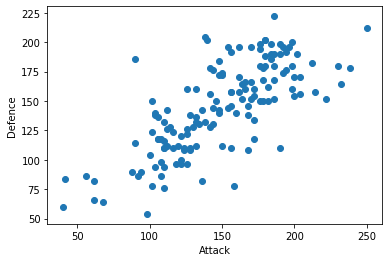

In [4]:
arr = readFileThroughCSV("pokemon_dataset.csv")

#Now arr contains the data as a list two stacked columns of X and Y coordinates
#print(arr)

plt.scatter(arr[:,0],arr[:,1])
plt.xlabel("Attack")
plt.ylabel("Defence")
plt.show()

**4) Estimating the optimum number of clusters.**

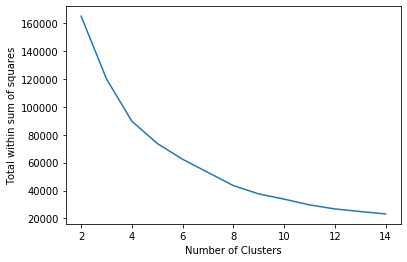

In [5]:
#Perform clustering for n_clusters from 2 to 15
num_clusters = np.arange(2,15)
i = 0;
n_inertia = np.zeros(num_clusters.shape)
for n in num_clusters:
    kmeans_model = kmeans(n_clusters=n)
    kmeans_model.fit(arr)
    n_inertia[i] = kmeans_model.inertia_
    i=i+1

plt.plot(num_clusters,n_inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Total within sum of squares")
plt.show()

**4) Dividing datapoints into different clusters depending upon their closeness to the centroids (representatives) of each cluster.**

In [6]:
kmeans_model = kmeans(n_clusters=4)
kmeans_model.fit(arr)

#Each point gets a label based on the cluster to which it belongs to
lab = kmeans_model.labels_

#Each clustrer has a centroid
centroid = kmeans_model.cluster_centers_

#Total within-cluster sum of squares (wss)
inertia = kmeans_model.inertia_

print(inertia)
print(lab)

89643.37889412175
[1 0 3 1 0 3 1 0 3 2 2 0 2 2 1 2 1 0 2 0 2 0 1 0 1 3 1 0 1 1 3 1 1 3 1 3 1
 3 2 1 2 0 1 0 3 1 0 1 0 2 0 1 0 1 3 1 0 1 3 1 1 3 2 1 0 1 0 3 1 0 3 1 3 1
 0 3 0 3 1 3 1 3 1 1 0 1 0 1 3 1 3 1 0 3 0 1 3 1 0 1 0 1 3 1 0 0 0 0 0 3 1
 0 2 0 0 1 0 1 0 1 3 0 3 0 3 3 3 0 2 3 3 1 1 3 3 3 0 0 3 0 3 0 3 1 0 3]


**5) Visualizing Kmean clusters.**

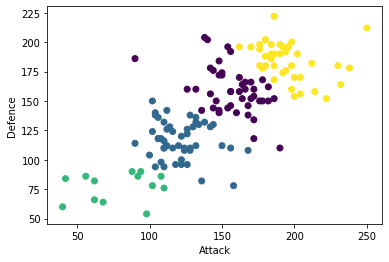

In [8]:
# Plot in single line
plt.scatter(arr[:,0],arr[:,1], c=lab)

#Or plot one by one as follows
#for i in range(max(lab)+1):
#    arrNew = arr[lab==i]
#    plt.plot(arrNew[:,0],arrNew[:,1],'*')

plt.xlabel("Attack")
plt.ylabel("Defence")
plt.show()

**Inference**

After performing K-mean, we divided each pokemon into four different clusters. Each cluster can be considered as one class of pokemon by the observation.

*Novice (Cyan)* - Pokemons with the least abilities in both aspects, attack, and defense.<br>
*Intermediate (Blue)* - Pokemons with moderate abilities.<br>
*Pro (Purple)* - Pokemons with high attack and defence abilities.<br>
*MVPs (Yellow)* - The finishers or the pokemon with the highest value.<br>

Since each one of them is classified, while in-game, when the opposition comes up with a pokemon from a particular cluster, we can be prepared with a pokemon from the same cluster or someone who can win the battle, as we would not want to exhaust pokemon from other clusters unless needed. It also helps strategize moves against pokemon in each cluster with a good game plan before the match. 